In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
folder = 'Vga'
filename = 'vga.txt'

In [0]:
folder = 'Hdmi'
filename = 'hdmi.txt'

In [0]:
folder = 'Type-c'
filename = 'typec.txt'

In [0]:
classes = ['Vga','Hdmi']

In [0]:
path = Path('data/cables')
dest = path/folder
dest.mkdir(parents=True,exist_ok = True)

In [0]:
download_images(path/filename,dest,max_pics=200)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [0]:
for c in classes:
  print(c)
  verify_images(path/c,delete=True,max_workers =8)

Vga


Hdmi


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path,train='.',valid_pct = 0.2,ds_tfms = get_transforms(),size=224).normalize(imagenet_stats)

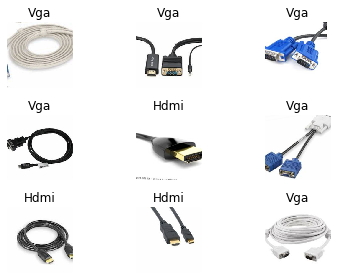

In [0]:
data.show_batch(rows = 3,figsize=(6,4))

In [0]:
data.classes,data.c,len(data.valid_ds),len(data.train_ds)

(['Hdmi', 'Vga'], 2, 64, 256)

In [0]:
learn = cnn_learner(data,models.resnet34,metrics= error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 306MB/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.047127,0.678347,0.312500,00:02
1,0.838338,1.403913,0.359375,00:02
2,0.632757,1.291499,0.281250,00:02
3,0.551953,1.113973,0.265625,00:02


In [0]:
learn.save("stage-1")

In [0]:
interp = ClassificationInterpretation.from_learner(learn)


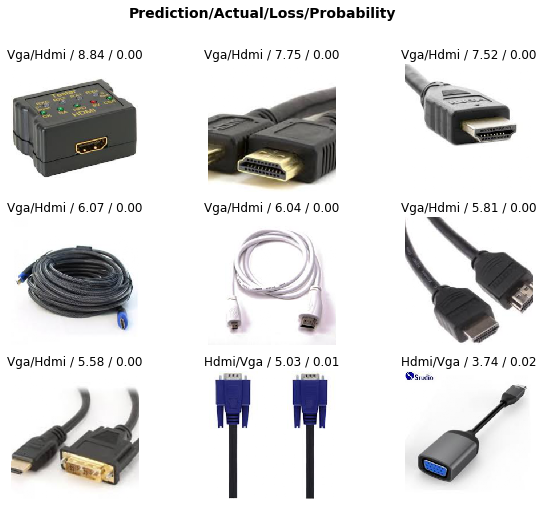

In [0]:
interp.plot_top_losses(9,figsize=(10,8))

In [0]:
interp.most_confused()

[('Hdmi', 'Vga', 14), ('Vga', 'Hdmi', 3)]

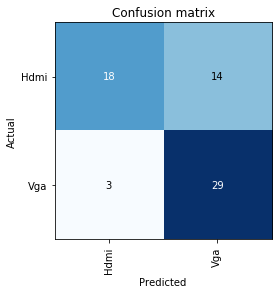

In [0]:
interp.plot_confusion_matrix()

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


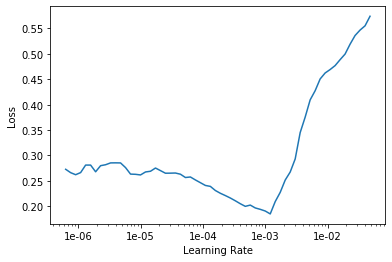

In [0]:
learn.recorder.plot()

In [0]:
learn.load('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(8,max_lr = slice(4e-05,9e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.193309,0.704043,0.156250,00:02
1,0.122970,0.821477,0.171875,00:02
2,0.099056,0.529947,0.125000,00:02
3,0.088612,0.620123,0.140625,00:02
4,0.072305,0.631311,0.156250,00:02
5,0.067517,0.608390,0.156250,00:02
6,0.060317,0.605324,0.156250,00:02
7,0.051780,0.608544,0.140625,00:02


In [0]:
learn.save('stage-2')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.most_confused()

[('Hdmi', 'Vga', 6), ('Vga', 'Hdmi', 3)]

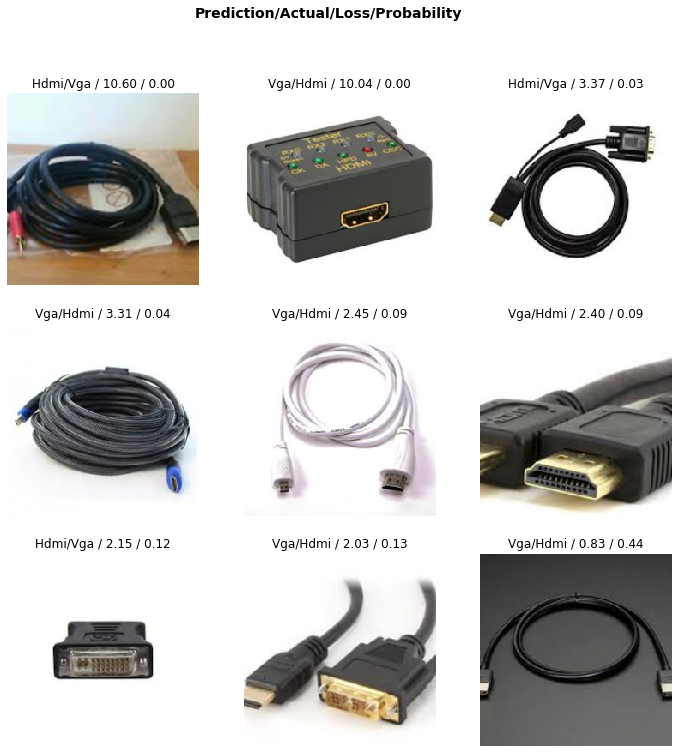

In [0]:
interp.plot_top_losses(9)

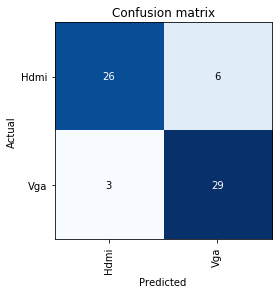

In [0]:
interp.plot_confusion_matrix()